# Overfitting and Underfitting

In machine learning models, we have to worry about twin concerns.  On the one hand, we might **overfit** our model to the dataset we have available.  If we train a model extremely accurately against the data itself, metrics we use for the quality of the model will probably show high values.  However, in this scenario, the model is unlikely to extend well to novel data, which is usually the entire point of developing a model and making predictions.  By training in a fine tuned way against one dataset, we might have done nothing more than memorize that collection of values; or at least memorize a spurious pattern that exists in that particular sample data collection.

To some extent (but not completely), overfitting is mitigated by larger dataset sizes.

In contrast, if we choose a model that simply does not have the degree of detail necessary to represent the underlying real-world phenomenon, we get an **underfit** model.  In this scenario, we *smooth too much* in our simplification of the data into a model.

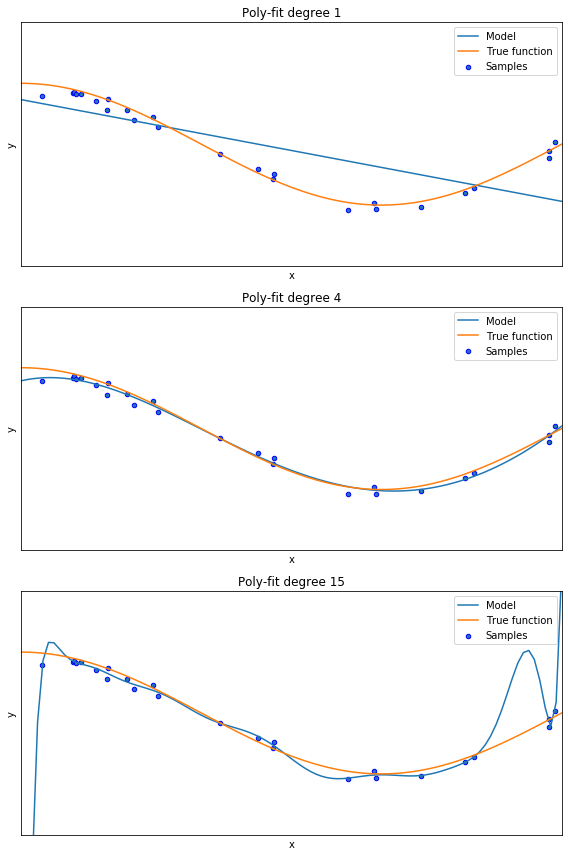

In [11]:
%matplotlib inline
from src.over_under_fit import show
show();

# Import Logisitic Regression and Random Forest

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Read the client training and testing data

Note that only 15 rows of training data are available, but we need to test against 100 rows of later data.

In [2]:
sample = pd.read_csv('data/bmi-training.csv')
test = pd.read_csv('data/bmi-testing.csv')
sample.head()

,age,height,weight,waist,TARGET
0,33.0,68.0,195.0,34.0,XL
1,36.0,71.0,180.0,32.0,M
2,30.0,65.0,160.0,32.0,S
3,28.0,70.0,172.0,31.0,M
4,31.0,70.0,170.0,32.0,M


## Standard X/y naming for features and target

In [3]:
X = sample.drop('TARGET', axis=1)
y = sample.TARGET

X_test = test.drop('TARGET', axis=1)
y_test = test.TARGET

# Logistic Regression

A simple model with inherently limited power but also limited ability to overfit

In [4]:
lr = LogisticRegression(multi_class='auto', solver='liblinear')
lr.fit(X, y)
print(f"Accuracy against the training data: {100*lr.score(X, y):.1f}%")
print(f"Accuracy against the testing data:  {100*lr.score(X_test, y_test):.1f}%")

Accuracy against the training data: 86.7%
Accuracy against the testing data:  39.0%


# Random Forest

A typical "powerful classifier" tends to overfit on limited data.  This tendency can be mitigated by choosing parameters that limit the "fit" of the model to the limited data.

In [5]:
rfc = RandomForestClassifier(n_estimators=20, random_state=1)
rfc.fit(X, y)
print(f"Accuracy against the training data: {100*rfc.score(X, y):.1f}%")
print(f"Accuracy against the testing data:  {100*rfc.score(X_test, y_test):.1f}%")

Accuracy against the training data: 100.0%
Accuracy against the testing data:  36.0%


In [6]:
rfc2 = RandomForestClassifier(max_depth=3, max_features=3, n_estimators=10, random_state=3)
rfc2.fit(X, y)
print(f"Accuracy against the training data: {100*rfc2.score(X, y):.1f}%")
print(f"Accuracy against the testing data:  {100*rfc2.score(X_test, y_test):.1f}%")

Accuracy against the training data: 80.0%
Accuracy against the testing data:  42.0%


# Visualizing a Decision Tree

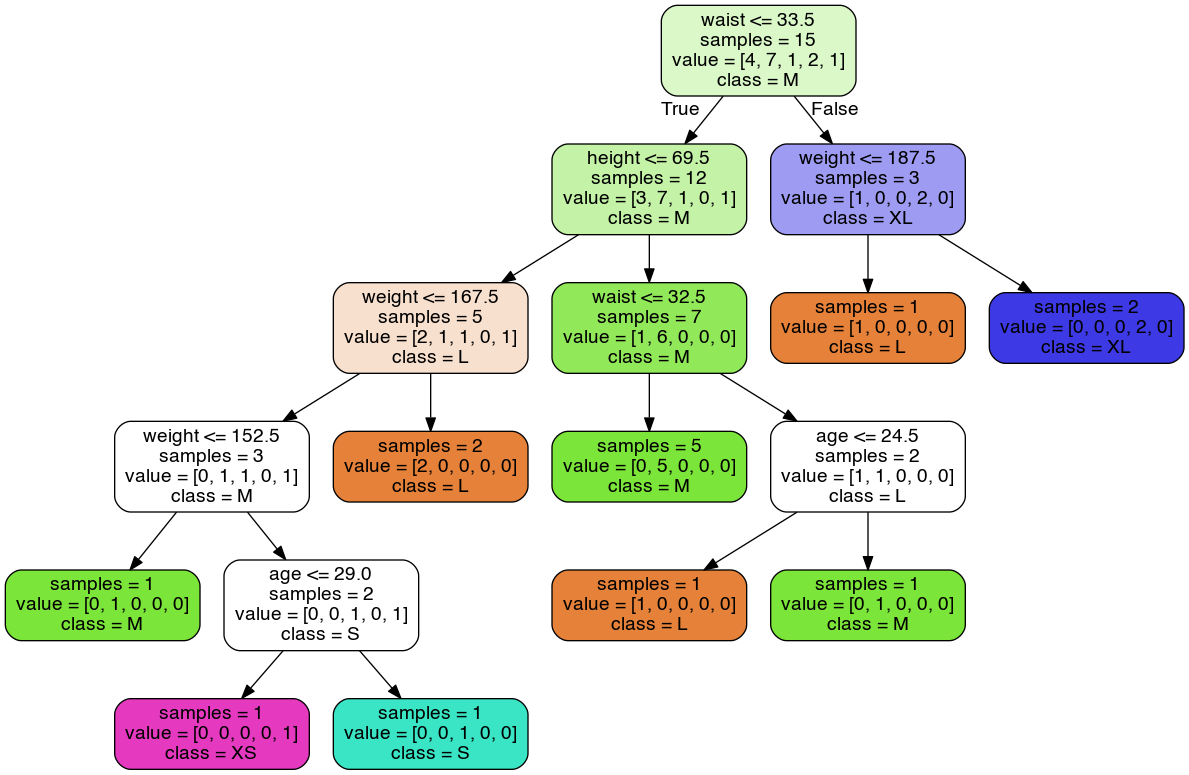

In [9]:
# Figure out where graphviz executable lives
dotpath = !which dot
tree = DecisionTreeClassifier()
tree.fit(X, y)

# Generate cut point diagram
from sklearn.tree import export_graphviz
import sys, subprocess
from IPython.display import Image

export_graphviz(tree, feature_names=X.columns, class_names=tree.classes_,
                out_file='garment-tree.dot', impurity=False, filled=True,
                rounded=True)
subprocess.check_call([dotpath[0],'-Tpng','garment-tree.dot','-o','garment-tree.png'])
Image('garment-tree.png')